In [1]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import pandas_profiling


import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
import matplotlib.pyplot as plt

#Who likes warnings anyway?
import warnings
warnings.filterwarnings('ignore')

#Pre-processing, tuning of parameters and scoring tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve

#Basic text mining tools
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import text #Allow stop_words customization

#Machine Learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

#Used for distribution fitting, and representation
from scipy import stats

#Time measuring for model training
from time import time




import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC":regr.aic, "BIC":regr.bic}

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
missing_values_list = ["unknown", "Unknown", "UNKNOWN", "nA", "na", "n/a", "-", "--", "#NUM!"]
data=pd.read_csv('./winemag-data-130k-v2.csv', na_values=missing_values_list)
data.head(3)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [25]:
us_wines = data.loc[data['country'] == 'US']
us_wines.shape

(54504, 14)

In [30]:
fill_col_dict = {'designation': 'missing_designation',
 'price':15,
 'taster_name': 'missing_taster_name',
 'region_2': 'someplace_2',
 'region_1': 'Someplace_1'}
for col in fill_col_dict.keys():
    us_wines[col] = us_wines[col].fillna(fill_col_dict[col])

us_wines.isna().sum()

designation    0
points         0
price          0
province       0
region_1       0
region_2       0
taster_name    0
variety        0
winery         0
dtype: int64

In [0]:
us_wines=us_wines.drop(columns=['id','description', 'taster_twitter_handle', 'title', 'country'])

In [20]:
#unique values
percent = (us_wines.nunique()/len(us_wines)*100).sort_values(ascending = False)
total = us_wines.nunique().sort_values(ascending = False)
unique_data  = pd.concat([total, percent], axis=1, keys=['Total Unique Values', 'Cardinality (%)'])
unique_data.reset_index()

,index,Total Unique Values,Cardinality (%)
0,designation,14183,26.021943
1,winery,5375,9.861662
2,region_1,264,0.484368
3,variety,257,0.471525
4,price,161,0.295391
5,province,27,0.049538
6,points,21,0.038529
7,region_2,17,0.031190
8,taster_name,15,0.027521


In [0]:
#missing values
us_wines.price = us_wines.price.fillna(us_wines.price.mean())
#total = us_wines.isnull().sum().sort_values(ascending = False)
#percent = (us_wines.isnull().sum()/us_wines.isnull().count()*100).sort_values(ascending = False)
#missing_data  = pd.concat([total, percent], axis=1, keys=['Total Missing Records', 'Total Missing Records (%)'])
#missing_data.reset_index()


In [16]:
us_wines.taster_name.dropna()

2               Paul Gregutt
3         Alexander Peartree
4               Paul Gregutt
10            Virginie Boone
12            Virginie Boone
                 ...        
129945         Matt Kettmann
129949        Virginie Boone
129950        Virginie Boone
129952        Virginie Boone
129967          Paul Gregutt
Name: taster_name, Length: 37730, dtype: object

In [31]:
us_wines.head(10)

,designation,points,price,province,region_1,region_2,taster_name,variety,winery
2,missing_designation,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,someplace_2,Alexander Peartree,Riesling,St. Julian
4,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
10,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,Cabernet Sauvignon,Kirkland Signature
12,missing_designation,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,Cabernet Sauvignon,Louis M. Martini
14,missing_designation,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,Chardonnay,Mirassou
19,missing_designation,87,32.0,Virginia,Virginia,someplace_2,Alexander Peartree,Meritage,Quiévremont
20,Vin de Maison,87,23.0,Virginia,Virginia,someplace_2,Alexander Peartree,Red Blend,Quiévremont
21,missing_designation,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Pinot Noir,Acrobat
23,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,Merlot,Bianchi


In [0]:
us_wines.designation = us_wines.designation.dropna()
us_wines.region_1 = us_wines.region_1.dropna()
us_wines.region_2 = us_wines.region_2.dropna()

In [0]:
#label encoding

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
#us_wines['tester_unique_id']= label_encoder.fit_transform(us_wines['tester_unique_id']) 
us_wines['region_1']= label_encoder.fit_transform(us_wines['region_1']) 
us_wines['region_2']= label_encoder.fit_transform(us_wines['region_2']) 

us_wines['designation']= label_encoder.fit_transform(us_wines['designation']) 
us_wines['province']= label_encoder.fit_transform(us_wines['province'])
us_wines['variety']= label_encoder.fit_transform(us_wines['variety']) 
us_wines['winery']= label_encoder.fit_transform(us_wines['winery']) 

In [0]:
us_wines['region_1'] = us_wines['region_1']/max(us_wines['region_1'])
us_wines['region_1'] = us_wines['region_1']

us_wines['designation'] = us_wines['designation']/max(us_wines['designation'])
us_wines['designation'] = us_wines['designation']

us_wines['province'] = us_wines['province']/max(us_wines['province'])
us_wines['province'] = us_wines['province']

us_wines['variety'] = us_wines['variety']/max(us_wines['variety'])
us_wines['variety'] = us_wines['variety']

us_wines['winery'] = us_wines['winery']/max(us_wines['winery'])
us_wines['winery'] = us_wines['winery']

us_wines['region_2'] = us_wines['region_2']/max(us_wines['region_2'])
us_wines['region_2'] = us_wines['region_2'] + 1

In [38]:
us_wines['price'].median()

3.4011973816621555

In [39]:
us_wines['price'].mean()

3.4219904546469255

In [63]:
us_wines.corr(method ='pearson') 

,designation,points,price,province,region_1,region_2,variety,winery
designation,1.000000,-0.156729,-0.216256,-0.004194,-0.030496,-0.027456,-0.055437,0.014554
points,-0.156729,1.000000,0.547688,-0.000713,0.114572,0.033109,-0.053099,0.004140
price,-0.216256,0.547688,1.000000,-0.111845,0.192592,0.099548,-0.164779,0.010999
province,-0.004194,-0.000713,-0.111845,1.000000,0.082926,0.070618,-0.008618,-0.024688
region_1,-0.030496,0.114572,0.192592,0.082926,1.000000,0.190176,0.005834,0.007361
region_2,-0.027456,0.033109,0.099548,0.070618,0.190176,1.000000,0.078597,0.017173
variety,-0.055437,-0.053099,-0.164779,-0.008618,0.005834,0.078597,1.000000,0.012031
winery,0.014554,0.004140,0.010999,-0.024688,0.007361,0.017173,0.012031,1.000000


 # model selection

In [44]:
y = us_wines.points
X=us_wines.drop(columns=['taster_name','points'])
X

,designation,price,province,region_1,region_2,variety,winery
2,0.998096,2.639057,0.730769,0.973485,1.941176,0.601562,0.710644
3,0.704364,2.564949,0.423077,0.333333,2.000000,0.667969,0.832713
4,0.947331,4.174387,0.730769,0.973485,1.941176,0.617188,0.857090
10,0.571882,2.944439,0.076923,0.503788,1.352941,0.105469,0.478415
12,0.998096,3.526361,0.076923,0.003788,1.705882,0.105469,0.530889
...,...,...,...,...,...,...,...
129945,0.440457,2.995732,0.076923,0.757576,1.058824,0.218750,0.097693
129949,0.068603,3.555348,0.076923,0.503788,1.352941,0.191406,0.325456
129950,0.109920,3.555348,0.076923,0.503788,1.352941,0.996094,0.401191
129952,0.998096,3.091042,0.076923,0.128788,1.352941,0.996094,0.417566


In [0]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [46]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  7 models on 6 predictors in 0.27258872985839844 seconds.
Processed  6 models on 5 predictors in 0.18598294258117676 seconds.
Processed  5 models on 4 predictors in 0.12044453620910645 seconds.
Processed  4 models on 3 predictors in 0.08031964302062988 seconds.
Processed  3 models on 2 predictors in 0.05170464515686035 seconds.
Processed  2 models on 1 predictors in 0.026322603225708008 seconds.
Total elapsed time: 0.750070333480835 seconds.


In [51]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[6, "model"].params)

-------------------
Backward Selection:
-------------------
designation    11.940350
price          16.107286
province        5.050889
region_2       10.385006
variety        10.882819
winery          5.758389
dtype: float64


In [52]:
print(models_bwd.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          2.374e+06
Date:                Fri, 15 May 2020   Prob (F-statistic):                        0.00
Time:                        21:07:04   Log-Likelihood:                     -2.1828e+05
No. Observations:               54504   AIC:                                  4.366e+05
Df Residuals:                   54503   BIC:                                  4.366e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
print(models_bwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.608e+06
Date:                Fri, 15 May 2020   Prob (F-statistic):                        0.00
Time:                        21:07:11   Log-Likelihood:                     -2.1017e+05
No. Observations:               54504   AIC:                                  4.203e+05
Df Residuals:                   54502   BIC:                                  4.204e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
print(models_bwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          7.765e+05
Date:                Fri, 15 May 2020   Prob (F-statistic):                        0.00
Time:                        21:07:41   Log-Likelihood:                     -2.0021e+05
No. Observations:               54504   AIC:                                  4.004e+05
Df Residuals:                   54498   BIC:                                  4.005e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Text(0, 0.5, 'BIC')

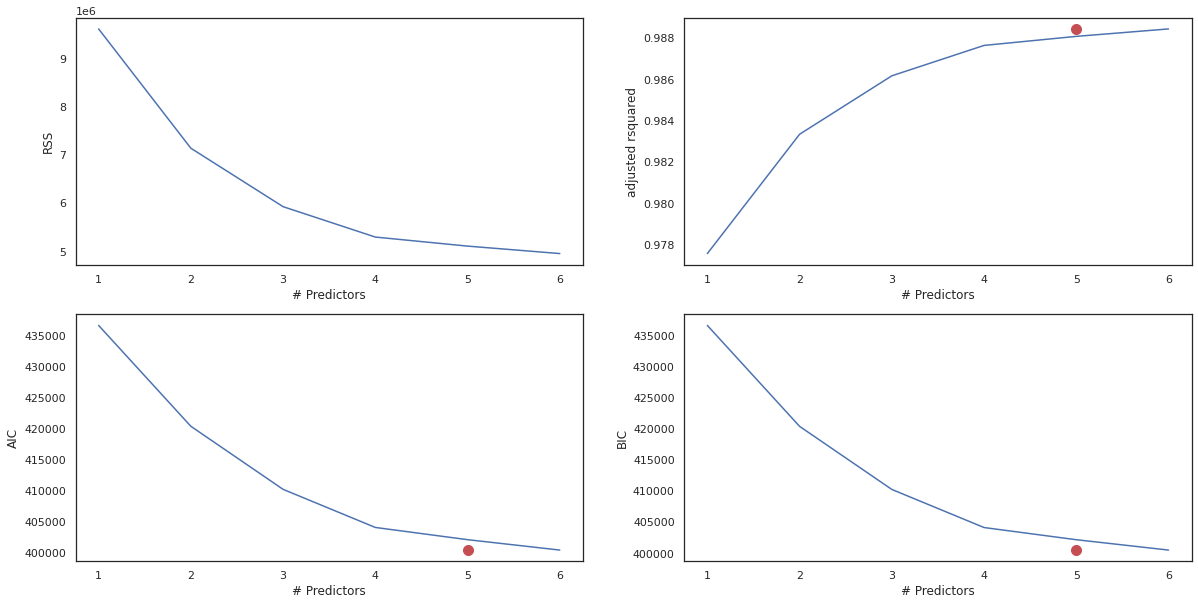

In [56]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_bwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_bwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_bwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_bwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [57]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y.values.reshape(-1,1))

# Make predictions using the testing set
preds = regr.predict(X)

# The R mean squared error
import math
print('R Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y, preds)))

R Mean squared error: 2.59
